In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

### 1. Formulate the statement of the interpolation problem with Cubic Spline [mathematical formula]

Let on interval $[a, b]$ be grid-based function $y_i = f(x_i)$ on grid $\Omega_n$, we should approximate this 
function $\tilde{f} -> \hat{f_i} = f_i$ with Cubic Spline:

$S_3 \in C^2[a, b]$, with $q = 1$, such that

$S_3(x) = \bigcup \limits_{i=0}^{n-1} S_{3, i}(x)$, 

$S_{3, i} = a_{0, i} + a_{1, i} (x - x_i) + a_{2, i} (x - x_i)^2 + a_{3, i} (x - x_i)^3 $,
where $i = 0, \ldots, n-1$, number of splines.

### 2. Formulate the functional and differential compatibility conditions [mathematical formula]


Compatibility conditions:
$\delta S^{(p_1)}_{3, i}(x_j) = S^{(p_1)}_{3, i}(x)$ $\large|_{x=x_i}$ $ - f^{(p_1)}(x)$ $\large |_{x=x_i}$ 
$ = 0, j = i, i+1$

Assume first method, where $p_1 = \{0, 2\}$

Functional compatibility conditions:
- 1) $\delta S_{3, i}(x)$ $\large|_{x=x_i}$ $= S_{3, i}(x_i)$ $ - f(x_i)$ $ = 0$
- 2) $\delta S_{3, i}(x)$ $\large|_{x=x_{i+1}}$ $= S_{3, i}(x_{i+1})$ $ - f(x_{i+1})$ $ = 0$

Differential compatibility conditions:
- 3) $\delta S^{''}_{3, i}(x)$ $\large|_{x=x_i}$ $= S^{''}_{3, i}(x_i)$ $ - f^{''}(x_i)$ $ = 0$
- 4) $\delta S^{''}_{3, i}(x)$ $\large|_{x=x_{i+1}}$ $= S^{''}_{3, i}(x_{i+1})$ $ - f^{''}(x_{i+1})$ $ = 0$



### 3. Formulate stitching conditions [mathematical formula]


Stitching conditions: $S^{(p_2)}_{3, i-1}(x)$ $\large|_{x=x_i}$ 
$= S^{(p_2)}_{3, i}(x)$ $\large|_{x=x_i}$  $ i = \overline{1, n-1}$

Assume first method, where $p_2 = \{1\}$

Stitching conditions:
* $S^{'}_{3, i-1}(x)$ $\large|_{x=x_i}$ 
$= S^{'}_{3, i}(x)$ $\large|_{x=x_i}$  $ i = \overline{1, n-1}$



### 4. Justify why these conditions provide you with the required smoothness [thesis text, no more than 500 characters]


Functional compatibility conditions solves interpolation problem. Stitching conditions solves problem with 
different tangents on the knots, and makes cubic spline piece-wise smooth function. Two conditions does not give 
enough equations, to find all coefficients.  So we add another differential conditions, which adds more unknown 
parameters to the system of equations, but with bounding conditions, the system becomes closed.


### 5. Derive dependency formula: the dependence of the second derivatives at the grid nodes on the increment of the function (the function values difference on the grid nodes). [Mathematical formulas derivation. Detailed, with clear transitions]

First derivative of spline:
$S^{'}_{3, i}(x) = a_{1,i} + 2a_{2, i}(x - x_i) + 3a_{3, i}(x - x_i)^2$

Second derivative of spline:
$S^{''}_{3, i}(x) = 2a_{2, i} + 6a_{3, i} (x - x_i)$

Substitute spline equation into (1), (2), and second derivative into (3), (4).

\begin{cases} a_{0,i} + a_{1,i}(x_i - x_i) + a_{2,i}(x_i - x_i)^2 + a_{3,i}(x_i - x_i)^3 - f(x_i) = 0 \\ a_{0,i} + a_{1,i}(x_{i+1} - x_i) + a_{2,i}(x_{i+1} - x_i)^2 + a_{3,i}(x_{i+1} - x_i)^3 - f(x_{i+1}) = 0 \\ 2a_{2,i} + 6a_{3,i}(x_i - x_i) - f^{''}(x_i) = 0 \\ 2a_{2,i} + 6a_{3,i}(x_{i+1} - x_i) - f^{''}(x_{i+1}) = 0 \end{cases}

let $h_{i+1} = x_{i+1} - x_{i}$, $\Delta f_i = f_{i+1} - f_{i}$, $f_i = f(x_i)$, $\Delta m_i = m_{i+1} - m_i$, $m_i = f^{''}(x_i)$

\begin{cases} a_{0, i} - f_i = 0 \\ a_{0,i} + a_{1,i}(x_{i+1} - x_i) + a_{2,i}(x_{i+1} - x_i)^2 + a_{3,i}(x_{i+1} - x_i)^3 - f_{i+1} = 0 \\ 2a_{2, i} - m_i = 0 \\ 2a_{2, i} + 6a_{3, i}(x_{i+1} - x_i) - m_{i+1} = 0 \end{cases}

Subtracting 4th from 3rd equations:

\begin{equation} -6a_{3, i}(x_{i+1} - x_i) - m_i + m_{i+1} = 0 \end{equation}

Substitute $h_{i+1}$ and $\Delta m_i$:

\begin{equation}-6a_{3, i}h_{i+1} + \Delta m_i = 0\end{equation}

\begin{equation} a_{3, i} = \frac{1}{6h_{i+1}}\Delta m_i\end{equation}

\begin{cases} a_{0, i} = f_i \\ f_i + a_{1,i}h_{i+1} + \frac{m_i}{2} h_{i+1}^2 + \frac{1}{6h_{i+1}}\Delta m_i h_{i+1}^3 - f_{i+1} = 0 \\ a_{2, i} = \frac{m_i}{2} \\ a_{3, i} = \frac{1}{6h_{i+1}}\Delta m_i \end{cases}

Solving second equation:

\begin{equation}f_i + a_{1,i}h_{i+1} + \frac{m_i}{2} h_{i+1}^2 + \frac{1}{6h_{i+1}}\Delta m_i h_{i+1}^3 - f_{i+1} = 0\end{equation}

Substitute $\Delta f_i$:

\begin{equation}-\Delta f_i + a_{1, i}h_{i+1} + \frac{m_i}{2} h_{i+1}^2 + \frac{1}{6h_{i+1}}\Delta m_i h_{i+1}^3 = 0\end{equation}

\begin{equation}a_{1, i}h_{i+1} = \Delta f_i - \frac{m_i}{2} h_{i+1}^2 - \frac{1}{6}\Delta m_i h_{i+1}^2\end{equation}

\begin{equation}a_{1, i} = \frac{1}{h_{i+1}}\Delta f_i - \frac{h_{i+1}}{2} m_i - \frac{h_{i+1}}{6}\Delta m_i\end{equation}

\begin{cases} a_{0, i} = f_i \\ a_{1, i} = \frac{1}{h_{i+1}}\Delta f_i - \frac{h_{i+1}}{2} m_i - \frac{h_{i+1}}{6}\Delta m_i \\  a_{2, i} = \frac{m_i}{2} \\ a_{3, i} = \frac{1}{6h_{i+1}}\Delta m_i \end{cases}

Substitute $a_{0, i}$, $a_{1,i}$, $a_{2,i}$, $a_{3, i}$ into spline equation:

\begin{equation}S_{3, i}(x) = f_i + \left( \frac{1}{h_{i+1}}\Delta f_i - \frac{h_{i+1}}{2} m_i - \frac{h_{i+1}}{6}\Delta m_i \right)(x-x_i) + \frac{m_i}{2} (x - x_i)^2 + \frac{1}{6h_{i+1}}\Delta m_i (x - x_i)^3\end{equation}

Taking first derivative of left part of equation of stitching conditions:

\begin{equation} S_{3, i-1}^{'}(x) = a_{1, i-1} + 2a_{2, i-1}(x - x_{i-1}) + 3a_{3, i-1}(x - x_{i-1})^2 \end{equation}

Taking first derivative of right part of equation of stitching conditions:

\begin{equation}S_{3, i}^{'}(x) = a_{1, i} + 2a_{2, i}(x - x_{i}) + 3a_{3, i}(x - x_{i})^2\end{equation}

Substitute coeffitients into stitching condition:

\begin{equation} \frac{1}{h_i} \Delta f_{i-1} - \frac{h_i}{2} m_{i-1} - \frac{h_i}{6} \Delta m_{i-1} +  m_{i-1}(x_i - x_{i-1}) + \frac{\Delta m_{i-1}}{2h_{i}}(x_i - x_{i-1})^2 = \frac{1}{h_{i+1}} \Delta f_{i} - \frac{h_{i+1}}{2} m_{i} - \frac{h_{i+1}}{6} \Delta m_{i} +  m_{i}(x_i - x_{i}) + \frac{\Delta m_{i}}{2h_{i+1}}(x_i - x_{i})^2 \end{equation}

Substituting $h_{i}$:
$$ \frac{1}{h_{i}} \Delta f_{i-1} - \frac{h_{i}}{2} m_{i-1} - \frac{h_{i}}{6} \Delta m_{i-1} +  m_{i-1} h_{i} + \frac{\Delta m_{i-1}}{2} h_{i} = \frac{1}{h_{i+1}} \Delta f_{i} - \frac{h_{i+1}}{2} m_{i} - \frac{h_{i+1}}{6} \Delta m_{i} $$

\begin{equation} \frac{h_i}{2}m_{i-1} + \frac{h_i}{3}\Delta m_{i-1} + \frac{h_{i+1}}{2}m_i + \frac{h_{i+1}}{6}\Delta m_i = \frac{1}{h_{i+1}} \Delta f_i - \frac{1}{h_i} \Delta f_{i-1}\end{equation}

Let's remove $\Delta m_i$ and $\Delta m_{i-1}$:

\begin{equation} \frac{h_i}{2}m_{i-1} + \frac{h_i}{3}(m_i - m_{i-1}) + \frac{h_{i+1}}{2}m_i + \frac{h_{i+1}}{6} (m_{i+1} - m_i) = \frac{1}{h_{i+1}} \Delta f_i - \frac{1}{h_i} \Delta f_{i-1} \end{equation}

\begin{equation} \frac{h_i}{2} m_{i-1} + \frac{h_i}{3} m_i - \frac{h_i}{3} m_{i-1} + \frac{h_{i+1}}{2} m_i + \frac{h_{i+1}}{6} m_{i+1} - \frac{h_{i+1}}{6} m_i =  \frac{1}{h_{i+1}} \Delta f_i - \frac{1}{h_i} \Delta f_{i-1} \end{equation}

\begin{equation} m_{i-1} \left( \frac{3h_i}{6} - \frac{2h_i}{6} \right) + m_i \left( \frac{h_i}{3} + \frac{3h_{i+1}}{6} - \frac{h_{i+1}}{6} \right) + \frac{h_{i+1}}{6} m_{i+1} =  \frac{1}{h_{i+1}} \Delta f_i - \frac{1}{h_i} \Delta f_{i-1}  \end{equation}

\begin{equation} \frac{h_i}{6}m_{i-1} + m_i \left( \frac{h_i}{3} + \frac{h_{i+1}}{3} \right) + \frac{h_{i+1}}{6} m_{i+1} =  \frac{1}{h_{i+1}} \Delta f_i - \frac{1}{h_i} \Delta f_{i-1} \end{equation}

\begin{equation} \frac{h_i}{6}m_{i-1} + \frac{h_i + h_{i+1}}{3} m_i + \frac{h_{i+1}}{6} m_{i+1} =  \frac{1}{h_{i+1}} \Delta f_i - \frac{1}{h_i} \Delta f_{i-1} \end{equation}

### 6. Create a system of equations using this formula [Matrix representation. Mathematical formulas]

$$\begin{bmatrix} 
\frac{h_1 + h_2}{3} & \frac{h_2}{6} & 0 & 0 & \dots & 0 & 0 & 0 & \frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1} \\ 
\frac{h_2}{6} & \frac{h_2 + h_3}{3} & \frac{h_3}{6} & 0 & \dots & 0 & 0 & 0 & \frac{\Delta f_2}{h_3} - \frac{\Delta f_1}{h_2} \\
0 & \frac{h_3}{6} & \frac{h_3 + h_4}{3} & \frac{h_4}{6} & \dots & 0 & 0 & 0 & \frac{\Delta f_3}{h_4} - \frac{\Delta f_2}{h_3} \\
\dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
0 & 0 & 0 & 0 & \dots & \frac{h_{n-1}}{6} & \frac{h_{n-1} + h_{n}}{3} & \frac{h_n}{6} & \frac{\Delta f_{n-1}}{h_{n}} - \frac{\Delta f_{n-2}}{h_{n-1}}
\end{bmatrix} $$



### 7. Explain what is an unknown variable in this system. whether the system is closed with respect to an unknown variable. What is missing for closure. [Text, no more than 200 characters]

Unknown variable is $m_i$, it is not closed, as we are missing two equations. For closure used different 
ways of approximation of derivatives on the end(Boundary Conditions). For natural spline: $m_0 = 0$, 
$m_n = 0$.



### 8. Bring this matrix to the appropriate form to use the Tridiagonal matrix algorithm [Mathematical derivation. Use Gauss Elimination]

Open notation of tridiagonal system:

\begin{equation} \alpha_i x_{i-1} - \beta_i x_i + \gamma_i x_{i+1} = \delta_i, \alpha_1 = \gamma_n = 0, i = \overline{1, n} \end{equation}

With extended matrix:

$$ \begin{bmatrix} 
-\beta_1 & \gamma_1 & 0 & 0 & \dots & 0 & 0 & \delta_1 \\ 
\alpha_2 & -\beta_2 & \gamma_2 & 0 & \dots & 0 & 0 & \delta_2 \\
0 & \alpha_3 & -\beta_3 & \gamma_3 & \dots & 0 & 0 & \delta_3 \\
\dots & \dots & \dots & \dots & \dots & \dots & \dots & \dots \\
0 & 0 & 0 & 0 & \dots & \alpha_{n-1} & -\beta_{n-1} & \delta_{n-1}
\end{bmatrix} $$, where we have:

$\alpha_i = \frac{h_i}{6}$, $\beta_i = -\frac{h_i + h_{i+1}}{3}$, $\gamma_i = \frac{h_{i+1}}{6}, \delta_i = \frac{\Delta f_i}{h_{i+1}} - \frac{\Delta f_{i-1}}{h_i}$

Appropriate form of Tridiagonal matrix:

$$ \begin{bmatrix} 
1 & -P_1 & 0 & 0 & \dots & Q_1 \\ 
0 & 1 & -P_2  & 0 & \dots & Q_2 \\
0 & 0 & 1 & -P_3 & \dots & Q_3 \\
\dots & \dots & \dots & \dots & \dots & \dots \\
0 & 0 & 0 & 1 & \dots & Q_{n-1}
\end{bmatrix} $$

**Step 1:** Divide 1st row by $-\beta_1$.

$$
\begin{bmatrix}
1 & -\frac{\gamma_1}{\beta_1} & 0 & 0 & \dots & 0 & 0 & -\frac{\delta_1}{\beta_1}
\end{bmatrix}
$$

**Step 2:** Subtruct 1st row multiplied by $\alpha_2$ from 2nd row:

$$
\begin{bmatrix}
1 & -\frac{\gamma_1}{\beta_1} & 0 & 0 & \dots & 0 & 0 & -\frac{\delta_1}{\beta_1} \\
0 & -\beta_2 + \frac{\gamma_1 \alpha_2}{\beta_1} & \gamma_2 & 0 & \dots & 0 & 0 & \delta_2 + \frac{\delta_1 \alpha_2}{\beta_1}
\end{bmatrix}
$$

**Step 3:** Divide 2nd row by $-\beta_2 + \frac{\gamma_1 \alpha_2}{\beta_1}$

$$
\begin{bmatrix}
1 & -\frac{\gamma_1}{\beta_1} & 0 & 0 & \dots & 0 & 0 & -\frac{\delta_1}{\beta_1} \\
0 & 1 & \gamma_2 : (-\beta_2 + \frac{\gamma_1 \alpha_2}{\beta_1}) & 0 & \dots & 0 & 0 & (\delta_2 + \frac{\delta_1 \alpha_2}{\beta_1}) : (-\beta_2 + \frac{\gamma_1 \alpha_2}{\beta_1})
\end{bmatrix}
$$

By following the steps and substituting values of $\beta_i$, $\alpha_i$, $\gamma_i$ and $\delta_i$:

$$
\begin{bmatrix}
1 & \frac{h_2}{2(h_1 + h_2)} & 0 & 0 & \dots & (\frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1}) \frac{3}{h_1 + h_2}  \\
0 & 1 & \frac{h_3}{2(h_2 + h_3)} - \frac{2 h_3 (h_1 + h_2)}{h_2^2} & 0 & \dots & (\frac{h_2}{2(h_1 + h_2)} (\frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1}) - \frac{\Delta f_2}{h_3} + \frac{\Delta f_1}{h_2}) : (-\frac{h_2 + h_3}{3} + \frac{h_2^2}{12(h_1 + h_2)}) \\
\dots & \dots & \dots & \dots & \dots & \dots \\
0 & 0 & 0 & 1 & \dots & (\frac{h_{n-1}}{6} Q_{n-2}) : (-\frac{h_{n-1} + h_n}{3} - \frac{h_{n-1}}{6} P_{n-2})
\end{bmatrix}
$$

### 9. Derive formulas of direct pass and reverse pass of Tridiagonal matrix algorithm [Mathematical formals]

Direct pass:

1. Find $P_1$ and $Q_1$

    From 8th exercise:
    $$-P_1 = -\frac{\gamma_1}{\beta_1} = \frac{h_2}{2(h_1 + h_2)}$$
    $$P_1 = -\frac{h_2}{2(h_1 + h_2)}$$
    $$Q_1 = -\frac{\delta_1}{\beta_1} = -(\frac{\Delta f_1}{h_2} - \frac{\Delta f_0}{h_1}) \frac{3}{h_1 + h_2}$$

2. Find coefficients $P_2, Q_2$; $P_3, Q_3$; $\dots$; $P_{n-1}, Q_{n-1}$, where

$$-P_2 = \gamma_2 : (-\beta_2 + \frac{\gamma_1 \alpha_2}{\beta_1}) =  \gamma_2 : (-\beta_2 + \alpha_2 \frac{\gamma_1}{\beta_1})$$

Substitute $P_1$:

$$P_2 = \frac{\gamma_2}{\beta_2 - \alpha_2 P_{1}}$$

Thus,

$P_i = \frac{\gamma_i}{\beta_i - \alpha_i P_{i-1}} = \frac{h_{i+1}}{6} : (-\frac{h_i + h_{i+1}}{3} - \frac{h_i}{6} P_{i-1}) = - \frac{h_{i+1}}{2(h_i + h_{i+1})} - \frac{h_{i+1}}{h_i} P_{i-1}$

$$Q_2 = (\delta_2 + \frac{\delta_1 \alpha_2}{\beta_1}) : (-\beta_2 + \frac{\gamma_1 \alpha_2}{\beta_1}) = (\delta_2 - \alpha_2 (-\frac{\delta_1}{\beta_1})) : (-\beta_2 + \alpha_2 \frac{\gamma_1}{\beta_1})$$

Substitute $P_1$ and $Q_1$:

$$Q_2 = \frac{\delta_2 - \alpha_2 Q_1}{-\beta_2 + \alpha_2 P_1} = \frac{\alpha_2 Q_{1} - \delta_2}{\beta_2 - \alpha_2 P_{1}}$$

Thus,

$Q_i = \frac{\alpha_i Q_{i-1} - \delta_i}{\beta_i - \alpha_i P_{i-1}} = (\frac{h_i}{6} Q_{i-1} - \frac{\Delta f_i}{h_{i+1}} + \frac{\Delta f_{i-1}}{h_i}) : (- \frac{h_i + h_{i+1}}{3} - \frac{h_i}{6} P_{i-1})$

Reverse pass:

1. Find $m_{n-1} = \frac{\alpha_{n-1} Q_{n-2} - \delta_{n-1}}{\beta_{n-1} - \alpha_{n-1} P_{n-2}} = (\frac{h_{n-1}}{6} Q_{n-2} - \frac{\Delta f_{n-1}}{h_{n}} + \frac{\Delta f_{n-2}}{h_{n-1}}) : (- \frac{h_{n-1} + h_{n}}{3} - \frac{h_{n-1}}{6} P_{n-2})$

2. Find $m_{n-2}, m_{n-3}, \dots, m_1$ with formula 

$m_{n-2} = P_{n-2} m_{n-1} + Q_{n-2} = P_{n-2} (\frac{h_{n-1}}{6} Q_{n-2} - \frac{\Delta f_{n-1}}{h_{n}} + \frac{\Delta f_{n-2}}{h_{n-1}}) : (- \frac{h_{n-1} + h_{n}}{3} - \frac{h_{n-1}}{6} P_{n-2}) + Q_{n-2}$

$m_{n-3} = P_{n-3} m_{n-2} + Q_{n-3}$

$m_1 = P_1 m_2 + Q_1$


### 10. Implement code prototype of the future algorithm implementation. Classes/methods (if you use OOP), functions. The final implementation (on language chosen by you) should not differ from the functions declared in the prototype. [Python code]

tridiagonal matrix
alpha [0, 0.016666666666666666, 0.016666666666666663, 0.016666666666666673, 0.016666666666666663, 0.016666666666666663, 0.016666666666666663, 0.01666666666666668] 
beta [-0.06666666666666667, -0.06666666666666667, -0.06666666666666667, -0.06666666666666667, -0.06666666666666665, -0.06666666666666665, -0.0666666666666667, -0.0666666666666667] 
gamma [0.016666666666666666, 0.016666666666666663, 0.016666666666666673, 0.016666666666666663, 0.016666666666666663, 0.016666666666666663, 0.01666666666666668, 0] 
delta [-2.245139882897927, -3.6327126400268037, -3.6327126400268015, -2.245139882897931, -3.552713678800501e-15, 2.245139882897934, 3.6327126400268015, 3.6327126400268046] 

forward pass
p [-0.25, -0.2666666666666666, -0.26785714285714296, -0.26794258373205737, -0.26794871794871794, -0.2679491583648231, -0.26794918998527256, -0.0] 
q [-33.67709824346891, -49.14284270883715, -45.21962027484936, -23.977852971987964, 6.424834963006974, 34.37347140105734, 49.1926007417712

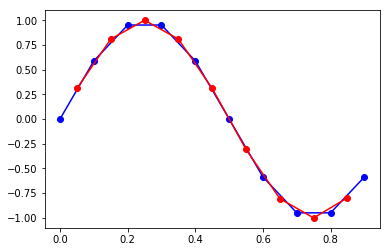

In [125]:
from pprint import pprint
from matplotlib import pyplot as plt

%matplotlib inline

N = 10
x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

M = 3
y1 = [0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951535, 0.5877852522924732,
      1.2246467991473532e-16, -0.5877852522924734, -0.9510565162951535, -0.9510565162951536,
      -0.5877852522924734]
y2 = [1.0, 0.8090169943749475, 0.30901699437494745, -0.30901699437494756, -0.8090169943749473,
      -1.0, -0.8090169943749472, -0.30901699437494756, 0.30901699437494723, 0.8090169943749473]
y3 = [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]

K = 9
x_head = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85]

m0, mN = 0, 0

y1_head = [0.3088791538716377, 0.8086540467262824, 0.9995568084495542, 0.8086400012457524,
           0.30893533579375737, -0.3090898360795863, -0.8078674998166081, -1.0024923138803028,
           -0.7976845264324319]
y2_head = [0.9319662914399691, 0.5925249845080666, -0.0013456361131560868, -0.5871424400554418,
           -0.9508051970241554, -0.9503148792696466, -0.5886133933189681, 0.0040478591864412305,
           0.5724219565732039]
y3_head = [0.05, 0.15000000000000002, 0.25, 0.35000000000000003, 0.45, 0.55, 0.6500000000000001,
           0.7500000000000001, 0.8500000000000001]


def create_tridiagonal(x, y, N):
    alpha, beta, gamma, delta = [], [], [], []
    
    for i in range(N-1):
        if i == 0:
            continue
        
        if i != 1:
            alpha.append((x[i] - x[i-1]) / 6)
        else:
            alpha.append(0)
        
        beta.append(-(x[i + 1] - x[i - 1]) / 3)
        
        if i != N-2:
            gamma.append((x[i + 1] - x[i]) / 6)
        else:
            gamma.append(0)
        
        deltafi, deltafi1 = y[i+1] - y[i], y[i] - y[i-1]
        delta.append(deltafi / (x[i + 1] - x[i]) - deltafi1 / (x[i] - x[i-1]))
    
    print('tridiagonal matrix\nalpha', alpha, '\nbeta', beta, '\ngamma', gamma, '\ndelta', delta, '\n')
    
    return alpha, beta, gamma, delta
    
    
def forward_pass(a, b, g, d, N):
    q = []
    p = []
    for i in range(N-1):
        if i == 0:
            continue
        
        pi_last = 0 if i == 1 else pi
        qi_last = 0 if i == 1 else qi
        
        pi = g[i - 1] / (b[i - 1] - a[i - 1] * pi_last)
        qi = (a[i - 1] * qi_last - d[i - 1]) / (b[i - 1] - a[i - 1] * pi_last)
        
        p.append(pi)
        q.append(qi)
        
    print('forward pass\np', p, '\nq', q, '\n')
    
    return p, q
    

def reverse_pass(p, q, N, m0, mN):
    m = [0] * N
    m[0] = m0
    m[-1] = mN
    
    for i in range(N-1):
        if i == 0:
            continue

        if i == 1:
            mn = q[-1]
        else:
            mn_last = mn
            pn2 = p[N - 2 - i]
            qn2 = q[N - 2 - i]
            mn = mn * pn2 + qn2
    
        m[N - i - 1] = mn
        
    print('derivatives\n', m, '\n')
    
    return m


def build_spline(m, x, y, N):
    coeff = []
    for i in range(N-1):
        hi1 = (x[i + 1] - x[i])
        deltay = (y[i + 1] - y[i])
        deltam = m[i + 1] - m[i]
        
        a0 = y[i]
        a1 = (deltay / hi1) - (m[i] * hi1 / 2) - (deltam * hi1 / 6)
        a2 = m[i] / 2
        a3 = deltam / (hi1 * 6)
                                                  
        coeff.append([a0, a1, a2, a3])
        
    print('coefficients:')
    [print(c) for c in coeff]
    print()
    return coeff

def get_y_head(spline, coeff, x_head, x):
    a0 = coeff[spline][0]
    a1 = coeff[spline][1] * (x_head - x[i])
    a2 = coeff[spline][2] * (x_head - x[i])**2
    a3 = coeff[spline][3] * (x_head - x[i])**3
    
    return a0 + a1 + a2 + a3

alpha, beta, gamma, delta = create_tridiagonal(x, y1, N)
p, q = forward_pass(alpha, beta, gamma, delta, N)
m = reverse_pass(p, q, N, m0, mN)
coeff = build_spline(m, x, y1, N)

y_head = []
for dot in x_head: 
    for i in range(N):
        if dot >= x[i] and dot <= x[i + 1]:
            y = get_y_head(i, coeff, dot, x)
            y_head.append(y)
            break 

plt.plot(x, y1, 'b-o')
plt.plot(x_head, y_head, 'r-o')
plt.show()

### 11. Derive formula of Cubic Spline method error [Mathematical formulas]

Cubic Spline error:

$|| f^{(p)}(x) - S_3^{(p)}(x) ||_{C[a,b]} = \max \limits_{[a,b]} |  f^{(p)}(x) - S_3^{(p)}(x) | \leq M_4 h^{4-p}, p = 0, 1, 2$

For function:

$|| f(x) - S_3(x) ||_{C[a,b]} = \max \limits_{[a,b]} |  f(x) - S_3(x) | \leq M_4 h^{4}$

For first derivative:

$|| f^{'}(x) - S_3^{'}(x) ||_{C[a,b]} = \max \limits_{[a,b]} |  f^{'}(x) - S_3^{'}(x) | \leq M_4 h^{3}$

For second derivative:

$|| f^{''}(x) - S_3^{''}(x) ||_{C[a,b]} = \max \limits_{[a,b]} |  f^{''}(x) - S_3^{''}(x) | \leq M_4 h^{2}$

However, this estimation of the error is valid if $f(x) \in C^4[a, b]$ and we have uniform grid. Although, 
usually we know nothing about $f$, we can not say anythonh about the method error. But if can assume that the
condition for $f$ is true, the method error could be used.

### 12. Rate the complexity of the algorithm [Text, and rate in terms of big O, no more than 100 characters]

Forward pass finds $n$ amount of $P$ and $Q$, reverse pass finds $n$ amount of $m$. Overall
complexity: $\mathcal{O}(n)$







### Congrats!